In [107]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
import math

dpi = 400
default_hatch_patterns = ["o" , "x", "*" , "." , "." , "\\" , "O", ".", "*"]

default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"

df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)
# df.info()

# Parte 3
Observem os níveis de mensuração das variáveis. Se ambas forem qualitativas lembrem-se de registrar frequências absolutas e percentuais. Se uma for quantitativa, NÃO CATEGORIZEM a variável, usem medidas de síntese em função dos valores da qualitativa.JUSTIFIQUEM as variáveis escolhidas para a análise, JUSTIFIQUEM as respostas (usando tabelas de frequências, gráficos ou quaisquer medidas de síntese necessárias). Comparem os resultados com aqueles obtidos individualmente para as duas variáveis na segunda parte.

## Questão 10
Na última pesquisa realizada há três anos a TYU descobriu que os alunos de Engenharia Civil e Engenharia de Computação estavam muito insatisfeitos com os seus cursos, já os de Engenharia Elétrica e de Produção estavam satisfeitos, os de Engenharia Mecânica e Química estavam predominantemente indiferentes. Estes perfis são confirmados pelos dados atuais?

In [108]:
# Agrupa as opiniões dentro de cada curso, conta o número de ocorrências, e corrige a ordem das colunas de Muito instatisfeito à Muito satisfeito
df_10 = df.groupby(["Curso", "Opinião"])["Opinião"].count().unstack(fill_value=0)[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# Calcula as porcentagens de opiniões dentro de cada curso
df_10p = df_10.div(0.01*df_10.sum(axis=1), axis=0)
df_10p

Opinião,Muito insatisfeito,Insatisfeito,Indiferente,Satisfeito,Muito satisfeito
Curso,,,,,
Civil,0.309278,4.536082,12.164948,28.453608,54.536082
Computação,0.309358,2.242846,6.960557,24.593968,65.893271
Elétrica,0.000000,0.680272,1.224490,9.659864,88.435374
Mecânica,35.955056,36.650615,15.409310,9.416800,2.568218
Produção,8.782145,27.413877,25.812712,25.230471,12.760796
Química,1.614311,14.877836,19.589878,32.722513,31.195462


In [109]:
# ax = df_10p.plot(kind="bar", stacked=True, edgecolor = "black", color=default_color, title="Relação entre cursos e opiniões")
# # Altera textura das barras
# for stack, hatch in zip(ax.patches, ''.join(i*len(df_10p) for i in default_hatch_patterns)): 
#     stack.set_hatch(hatch)
# # Insere legenda personalizada
# ax.legend(loc='lower left', bbox_to_anchor=(1, 0), handlelength=4, handleheight=4) 

# # Salva figura na pasta dedicada
# plt.savefig('Figuras\Q10_stacked.png', bbox_inches='tight', dpi=dpi)

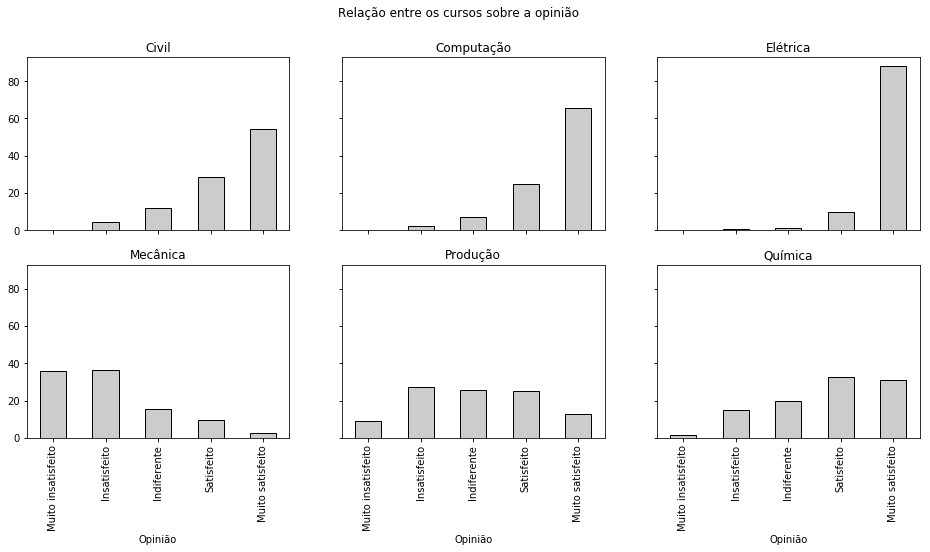

In [4]:
df_10p.T.plot(kind="bar", layout=(2,3), color=default_color, subplots=True, edgecolor = "black", legend=False, sharey=True,  sharex=True, figsize=(16,7), title="Relação entre os cursos sobre a opinião")

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q10.png', bbox_inches='tight', dpi=dpi)

Os perfis não são confirmados: A maioria dos alunos dos cursos de Engenharia Civil e Computação classificou-os como "Muito satisfeito". 
Os alunos de Engenharia Elétrica estão atualmente em sua maioria muito satisfeitos, totalizando 88.4% do total. Enquanto isso, os de Produção reduziram seu conceito e estão agora em sua média indiferentes.
Os alunos de Engenharia Mecânica estão atualmente em sua maioria insatisfeitos ou muito insatisfeitos com seus cursos, e os de Engenharia Química permanecem indiferentes.

## Questão 11
Na pesquisa do item 10 não foi identificada associação entre o turno e o curso escolhido pelo aluno da TYU. Os dados atuais confirmam este padrão?

In [6]:
# Agrupa as opiniões dentro de cada turno de cada curso e conta o número de ocorrências
df_11 = df.groupby(["Curso", "Turno"])["Turno"].count().unstack(fill_value=0)
# Corrige a ordem das colunas de Muito instatisfeito à Muito satisfeito
# df_11 = df_11[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# Calcula as porcentagens de opiniões dentro de cada curso
df_11p = df_11.div(0.01*df_11.sum(axis=1), axis=0)
df_11p#.plot(kind="bar")

Turno,Diurno,Integral,Noturno
Curso,,,
Civil,30.690010,10.092688,59.217302
Computação,24.089853,4.647560,71.262587
Elétrica,8.225697,1.087695,90.686608
Mecânica,16.889364,79.155532,3.955104
Produção,35.832522,48.101266,16.066212
Química,37.064460,25.783972,37.151568


In [7]:
# # Imprime gráfico com relação entre cursos e escolaridade dos alunos
# ax = df_11p.plot(kind="bar", grid=True, stacked=False, edgecolor = "black", color=default_color, figsize=(11,4), title="Relação entre cursos e turnos escolhidos")

# # Altera textura das barras
# for stack, hatch in zip(ax.patches, ''.join(i*len(df_11p) for i in default_hatch_patterns)): 
#     stack.set_hatch(hatch)
# # Insere legenda personalizada
# ax.legend(loc='lower right', bbox_to_anchor=(1, 1), handlelength=3, handleheight=3) 
# # Salva figura na pasta dedicada
# plt.savefig('Figuras\Q11.png', bbox_inches='tight', dpi=dpi)

Notou-se sim uma diferença de opiniões dependendo do turno do cada aluno do mesmo curso.
Nos cursos de Eng. Civil, Computação, Eng. Elétrica e Eng. Química há muito mais alunos satisfeitos e muito satisfeitos no turno noturno em comparação aos outros turnos. Além disso, em todos os cursos, o turno Integral foi o que obteve a pior classificação pelos alunos.

## Questão 12
Na pesquisa do item 10 os alunos do turno noturno queixaram-se muito dos seus cursos, os professores alocados para o turno e a própria infraestrutura seriam piores do que as dos outros dois turnos. Já os alunos dos demais turnos apresentavam grande satisfação. A direção da TYU realizou várias mudanças, incluindo contratação de novos professores e melhorias na infraestrutura para o turno noturno. De acordo com os dados atuais o investimento deu resultado? E os outros turnos, mantiveram as opiniões positivas?

In [8]:
# Agrupa as opiniões dentro de cada curso, conta o número de ocorrências, e corrige a ordem das colunas de Muito instatisfeito à Muito satisfeito
df_12 = df.groupby(["Turno", "Opinião"])["Opinião"].count().unstack(fill_value=0)[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# Calcula as porcentagens de opiniões dentro de cada curso
df_12p = df_12.div(0.01*df_12.sum(axis=1), axis=0)
df_12p

Opinião,Muito insatisfeito,Insatisfeito,Indiferente,Satisfeito,Muito satisfeito
Turno,,,,,
Diurno,0.228137,9.429658,28.669202,47.756654,13.916350
Integral,27.548807,44.158661,20.421444,7.313294,0.557794
Noturno,0.000000,0.048876,1.857283,16.764418,81.329423


In [9]:
# # Imprime gráfico de linhas com variáveis "Diurno", "Integral" e "Noturno"
# ax = df_12p.plot(kind="bar", grid=True, edgecolor = "black", color=default_color, figsize=(16,7), title="Relação entre turnos e opiniões")
# # Altera textura das barras
# for stack, hatch in zip(ax.patches, ''.join(i*len(df_12p) for i in default_hatch_patterns)): 
#     stack.set_hatch(hatch)
# # Insere legenda personalizada
# ax.legend(loc='lower right', bbox_to_anchor=(1, 1), handlelength=3, handleheight=2) 
# # Salva figura na pasta dedicada
# plt.savefig('Figuras\Q12_pie.png', bbox_inches='tight', dpi=dpi)

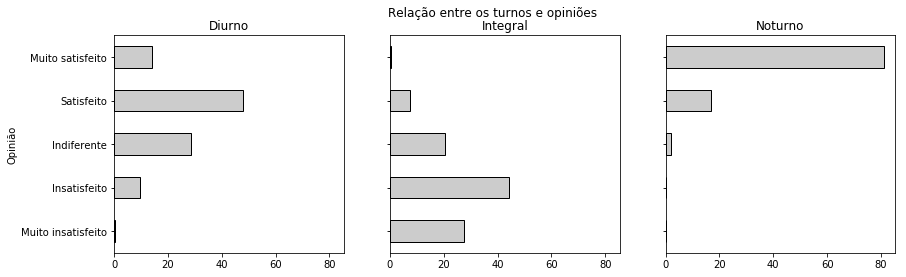

In [10]:
# Imprime 3 gráficos de barras das variáveis "Diurno", "Integral" e "Noturno"
ax = df_12p.T.plot(kind="barh", layout=(1,3), subplots=True, legend=False, edgecolor = "black", color=default_color, sharey=True,  figsize=(14,4), title="Relação entre os turnos e opiniões")

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q12.png', bbox_inches='tight', dpi=dpi)

In [11]:
print("O investimento no turno Noturno deu muito resultado e atualmente a maior parte dos alunos ({:.1f}%) está muito satisfeita. Entretanto, o turno Integral está em sua maior parte insatisfeito, e apenas {:.1f}% está satisfeito ou muito satisfeito".format(df_12p["Muito satisfeito"]["Noturno"], df_12p["Muito satisfeito"]["Integral"]+df_12p["Satisfeito"]["Integral"]))

O investimento no turno Noturno deu muito resultado e atualmente a maior parte dos alunos (81.3%) está muito satisfeita. Entretanto, o turno Integral está em sua maior parte insatisfeito, e apenas 7.9% está satisfeito ou muito satisfeito


## Questão 13
Há um rumor entre os professores da TYU que os cursos de Engenharia Elétrica e Química, por serem “mais difíceis” teriam um maior percentual de alunos que cursaram o ensino médio total ou predominantemente em escola particular, que supõe-se ter preparado melhor os alunos. E os cursos de Engenharia Civil e de Produção, por serem “mais fáceis” teriam um maior percentual de alunos que cursaram o ensino médio total ou predominantemente em escola pública, que se supõe não preparou os alunos tão bem quanto as particulares. E ainda, que nos demais cursos haveria uma distribuição equilibrada entre alunos que cursaram ensino médio em escolas públicas e particulares. Os dados atuais confirmam a suspeita?

In [12]:
# Agrupa o número de ocorrências de escolas dentro de cada curso, e corrige a ordem das colunas de Somente em pública a Somente em particular
df_13 = df.groupby(["Curso", "Ensino médio"])["Ensino médio"].count().unstack(fill_value=0)
# Filtra as 4 colunas de classificação de escola para apenas 2: "Pública ou Particular"
df_13f = pd.DataFrame()
df_13f["Pública"] = df_13["Somente em pública"] + df_13["Maior parte em pública"]
df_13f["Particular"] = df_13["Maior parte em particular"] + df_13["Somente em particular"]
# Adiciona linha com valores da universidade inteira
# df_13f.loc['Média'] = df_13f.sum()
# Calcula as porcentagens de opiniões dentro de cada curso
df_13fp = df_13f.div(0.01*df_13f.sum(axis=1), axis=0)
df_13fp

,Pública,Particular
Curso,,
Civil,72.633745,27.366255
Computação,69.582043,30.417957
Elétrica,50.034037,49.965963
Mecânica,71.550802,28.449198
Produção,71.393881,28.606119
Química,73.831367,26.168633


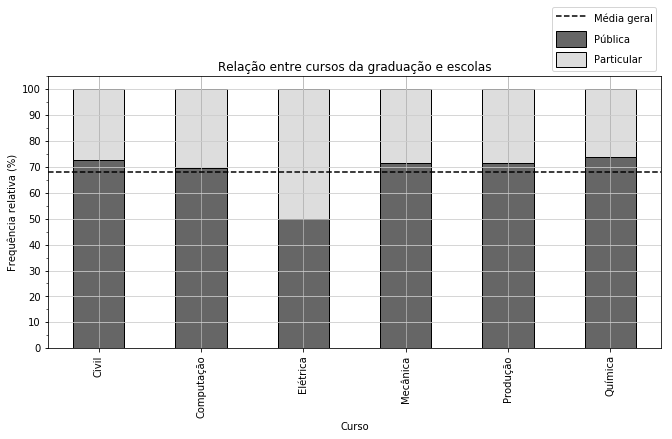

In [13]:
cmap, norm = colors.from_levels_and_colors([2,1,0], ["#666666", "#dddddd"])

# Imprime gráfico com relação entre cursos e escolaridade dos alunos
ax = df_13fp.plot(kind="bar", stacked=True, grid=True, edgecolor = "black", colormap=cmap, figsize=(11,5), title="Relação entre cursos da graduação e escolas")
# Insere linha de média
ax.axhline(y=df_13fp["Pública"].mean(), color='black', linestyle='--', label="Média geral")

# Insere legenda personalizada
ax.legend(loc='lower right', bbox_to_anchor=(1, 1), handlelength=3, handleheight=2) 
ax.set_ylabel("Frequência relativa (%)")

ax.set_yticks(np.arange(0, 110, 10))
ax.set_yticks(np.arange(0, 110, 5), minor=True)
ax.grid(axis="y", color=default_grid_color)

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q13.png', bbox_inches='tight', dpi=dpi)

In [14]:
print("De modo geral, com exceção do curso de Eng. Elétrica, os cursos apresentam uma razão relativamente constante de alunos que cursaram predominantemente o ensino médio em escolas públicas. Este valor é situado próximo a média da universidade que é de {:.1f}%. Portanto todos os argumentos apresentados são inválidos. É importante notar, entretanto, que o curso de Eng. Elétrica é discrepante da média e têm apenas {:.1f}% de seus alunos provenientes de escolas públicas.".format(df_13fp["Pública"].mean(), df_13fp["Pública"]["Elétrica"]))

De modo geral, com exceção do curso de Eng. Elétrica, os cursos apresentam uma razão relativamente constante de alunos que cursaram predominantemente o ensino médio em escolas públicas. Este valor é situado próximo a média da universidade que é de 68.2%. Portanto todos os argumentos apresentados são inválidos. É importante notar, entretanto, que o curso de Eng. Elétrica é discrepante da média e têm apenas 50.0% de seus alunos provenientes de escolas públicas.


## Questão 14
Na pesquisa do item 10 constatou-se que os alunos mais abastados eram indiferentes, os mais pobres estavam mais satisfeitos e os com renda intermediária insatisfeitos com seus cursos. Os dados atuais confirmam esta constatação do passado?

Opinião,Muito insatisfeito,Insatisfeito,Indiferente,Satisfeito,Muito satisfeito
Renda,,,,,
"(1, 2]",1.089385,9.636872,15.209497,27.667598,46.396648
"(2, 6]",31.388416,41.098807,16.950596,8.219761,2.342419
"(6, 25]",70.796460,14.159292,5.309735,5.309735,4.424779


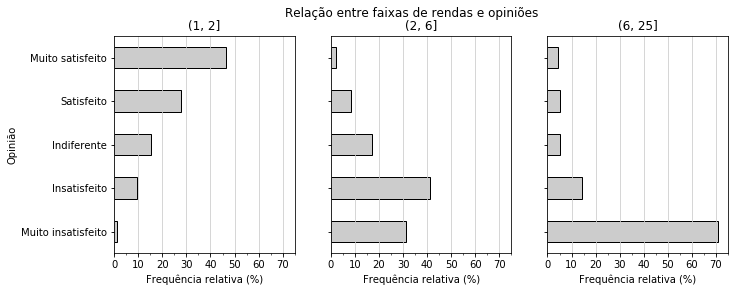

In [31]:
bins = [1, 2, 6, 25]
df_14B = df.groupby([pd.cut(df["Renda"], bins), "Opinião"])["Opinião"].count().unstack(fill_value=0)[["Muito insatisfeito", "Insatisfeito", "Indiferente", "Satisfeito", "Muito satisfeito"]]
# Calcula as porcentagens de opiniões dentro de cada grupo
df_14Bp = df_14B.div(0.01*df_14B.sum(axis=1), axis=0)

# Imprime 3 gráficos para cada faixa de renda
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(11, 4))
df_14Bp.T.plot(ax=axes, kind="barh", legend=False, subplots=True, edgecolor = "black", color=default_color, title="Relação entre faixas de rendas e opiniões")

for ax in axes:
    ax.set_xlabel("Frequência relativa (%)")
    ax.set_xticks(np.arange(0, 80, 10))
    ax.set_xticks(np.arange(0, 80, 5), minor=True)
    ax.grid(axis="x", color=default_grid_color)

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q14_categorizado.png', bbox_inches='tight', dpi=dpi)

df_14Bp

In [16]:
df["Renda"].describe()

count    9974.000000
mean        1.781226
std         1.180862
min         1.000000
25%         1.100000
50%         1.360000
75%         2.000000
max        24.560000
Name: Renda, dtype: float64

In [30]:
# # Agrupa as renda, mostra o número de opiniões para cada grupo, e corrige a ordem das colunas de Muito instatisfeito à Muito satisfeito
# bins = [1, 1.5, 2.5, 4, 6, 9, 13, 18, 25] #5*math.log10(df["Renda"].count())
# df_14 = df.groupby([pd.cut(df["Renda"], 5*math.log10(df["Renda"].count())), "Opinião"])["Opinião"].count().unstack(fill_value=0)[["Muito satisfeito", "Satisfeito", "Indiferente", "Insatisfeito", "Muito insatisfeito"]]
# # Calcula as porcentagens de opiniões dentro de cada grupo
# df_14p = df_14.div(0.01*df_14.sum(axis=1), axis=0)

# # Imprime o gráfico com informações de proporção (esquerda) e quantidade (direta) de opiniões para cada renda.
# fig, ax = plt.subplots(1,2, figsize=(16,4))
# df_14p.plot(kind="bar", stacked=True, ax=ax[0])
# df_14.plot(kind="bar", stacked=True, ax=ax[1])
# # Altera textura das barras
# for stack, hatch in zip(ax[1].patches, ''.join(i*len(df_14) for i in default_hatch_patterns)): 
#     stack.set_hatch(hatch)

In [110]:
# fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True, figsize=(7, 11))
# df_14p.plot(ax=axes, kind="bar", subplots=True, legend=False, edgecolor = "black", color=default_color, title="Relação entre renda e satisfação com o curso")
# # for ax in axes:
# #     ax.set_ylabel("Frequência relativa (%)")

# # # Insere linhas de tendência central
# # axes[0].axvline(x=df_14p["Muito satisfeito"].mean(), color='black', linestyle='--')
# # Salva figura na pasta dedicada
# plt.savefig('Figuras\Q14.png', bbox_inches='tight', dpi=dpi)


Para responder esta pergunta, considerou-se que os alunos abastados tinham renda maior que 4 salários mínimos, o mais pobres com renda inferior a 2 salários mínimos, e o os intermediários na faixa restante.
Constatou-se que os alunos mais pobres estavam muito satisfeitos porém os mais abastados estavam muito insatisfeitos, invalidando o argumento. Os alunos de renda intermediária continuam de maneira geral insatisfeitos com seus cursos.

## Questão 15
Também na pesquisa do item 10 constatou-se que os alunos dos cursos de Engenharia Química e Elétrica apresentavam os maiores IAAs, e que os de Engenharia Civil apresentavam os menores, com os outros cursos tendo um desempenho intermediário. Os dados atuais confirmam esta constatação do passado?

In [19]:
df["Curso"].dropna().unique()

array(['Mecânica', 'Química', 'Computação', 'Produção', 'Elétrica',
       'Civil'], dtype=object)

/home/cleber/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


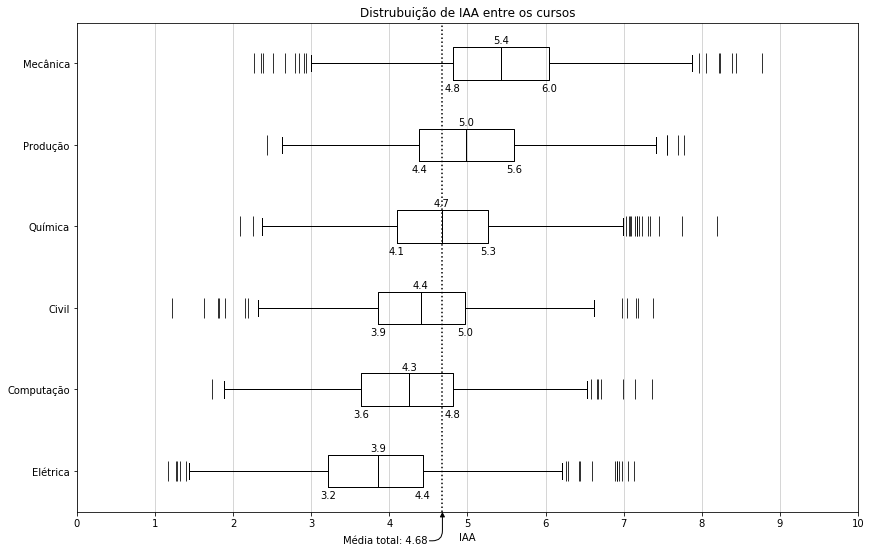

In [20]:
media_total = df["IAA"].mean()

fig = plt.figure(1, figsize=(default_box_width, 9))
ax = fig.add_subplot(111)

bplot = ax.boxplot([df[df["Curso"]=="Elétrica"]["IAA"], df[df["Curso"]=="Computação"]["IAA"], df[df["Curso"]=="Civil"]["IAA"], df[df["Curso"]=="Química"]["IAA"], df[df["Curso"]=="Produção"]["IAA"], df[df["Curso"]=="Mecânica"]["IAA"]], vert=False, widths=0.4)
ax.set_yticklabels([ 'Elétrica', 'Computação', 'Civil','Química','Produção','Mecânica'])
ax.set_xlabel("IAA")
ax.set_title("Distrubuição de IAA entre os cursos")
ax.set_xbound(0,10)
ax.set_xticks(np.arange(0, 11, 1))
ax.grid(which='major', axis="x", color=default_grid_color)

for line in bplot['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y+0.04, '%.1f' % x, horizontalalignment='center') # draw above, centered
    line.set(color="black")

for line in bplot['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    plt.text(x,y-0.04, '%.1f' % x, horizontalalignment='center', verticalalignment='top')      # below
    x, y = line.get_xydata()[3] # bottom of right line
    plt.text(x,y-0.04, '%.1f' % x, horizontalalignment='center', verticalalignment='top')      # below
        
for flier in bplot['fliers']:
    flier.set(marker=default_box_marker, alpha=default_box_marker_alpha, markersize=default_box_marker_size)

    
# Insere anotação sobre a linha de média
ax.annotate('Média total: {:0.2f}'.format(media_total), xy=(media_total, 0), xytext=(-15, -29),
    xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="right", verticalalignment='center',
    arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0, connectionstyle='angle,angleA=0,angleB=-90,rad=10'),)
        
        
# Insere linhas de tendência central
ax.axvline(x=media_total, color='black', linestyle=':',  linewidth=1.5)

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q15_box.png', bbox_inches='tight', dpi=dpi)

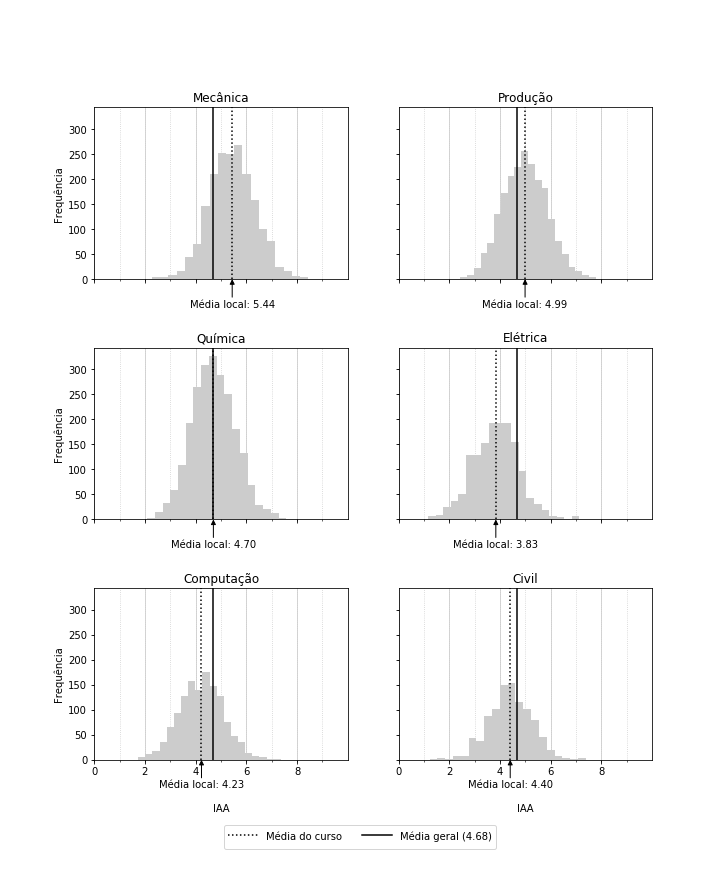

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(10, 12), constrained_layout=True)

# fig.suptitle("Frequência de IAAs nos cursos", fontsize="x-large")
media_total = df["IAA"].mean()
                    
for i in range(6):
        curso=df["Curso"].dropna().unique()[i]
        
        df[df["Curso"]==curso]["IAA"].plot(ax=axes[i-3*math.floor(i/3)][math.floor(i/3)], kind="hist", title=curso, xlim = (0,10), color=default_color, bins=20)
        plt.subplots_adjust(hspace=.4)
        
        # Insere linhas de tendência central
        media_local = df[df["Curso"]==curso]["IAA"].mean()
        axes[i-3*math.floor(i/3)][math.floor(i/3)].axvline(x=media_local, color='black', linestyle=':')
        axes[i-3*math.floor(i/3)][math.floor(i/3)].axvline(x=media_total, color='black', linestyle="-", linewidth=1.5)
        axes[i-3*math.floor(i/3)][math.floor(i/3)].set_xlabel("\n\nIAA")
        axes[i-3*math.floor(i/3)][math.floor(i/3)].set_ylabel("Frequência")
        axes[i-3*math.floor(i/3)][math.floor(i/3)].set_xticks(np.arange(0, 10, 2))
        axes[i-3*math.floor(i/3)][math.floor(i/3)].set_xticks(np.arange(0, 10, 1), minor=True)
        axes[i-3*math.floor(i/3)][math.floor(i/3)].grid(which='major', axis="x", color=default_grid_color)
        axes[i-3*math.floor(i/3)][math.floor(i/3)].grid(which='minor', axis="x", color=default_grid_color, linestyle=":")        
        # Insere anotação sobre a linha de média
        axes[i-3*math.floor(i/3)][math.floor(i/3)].annotate('Média local: {:0.2f}'.format(media_local), xy=(media_local, 0), xytext=(0, -25),
            xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0),)
        
# Insere legenda personalizada
fig.legend(["Média do curso", "Média geral (" + str(round(media_total,2)) + ")"], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.06), handlelength=3, handleheight=2) 

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q15_hist.png', bbox_inches='tight', dpi=dpi)

## Questão 16
Também na pesquisa do item 10 constatou-se a existência de correlação linear entre a Nota no ENEM e seus IAAs: alunos com maiores notas no ENEM costumavam ter maior IAA, e parecia apropriado ajustar uma reta ao diagrama de dispersão. Os dados atuais confirmam esta constatação do passado?

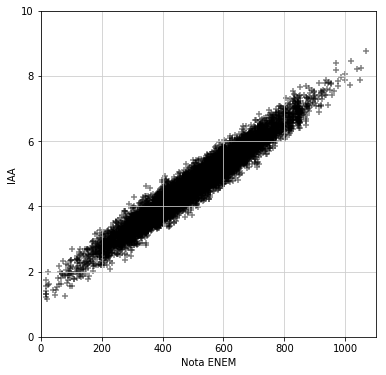

In [111]:

# cmap, norm = colors.from_levels_and_colors([2,1,0], ["#666666", "#dddddd"])
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df["Nota ENEM"], df["IAA"], alpha=0.5, color="black", marker="+")
ax.set(xlabel="Nota ENEM", ylabel="IAA")
ax.set(xticks=np.arange(0, 1200, 200), yticks=np.arange(0, 11, 2))
ax.set(xbound=(0,1100), ybound=(0,10))

ax.grid(axis="both", color=default_grid_color)

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q16.png', bbox_inches='tight', dpi=dpi)